In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Problem 1 - Markov Transition Matrices

In [3]:
# a

MT_a = np.matrix('.5, .5, 0; .25, .5, .25; 0, .5, .5')
MT_a

matrix([[ 0.5 ,  0.5 ,  0.  ],
        [ 0.25,  0.5 ,  0.25],
        [ 0.  ,  0.5 ,  0.5 ]])

In [4]:
steps_a = [2, 5, 10, 25]

for i in steps_a:
    print '%s steps ahead' % str(i)
    print MT_a ** i
    print ''

2 steps ahead
[[ 0.375  0.5    0.125]
 [ 0.25   0.5    0.25 ]
 [ 0.125  0.5    0.375]]

5 steps ahead
[[ 0.265625  0.5       0.234375]
 [ 0.25      0.5       0.25    ]
 [ 0.234375  0.5       0.265625]]

10 steps ahead
[[ 0.25048828  0.5         0.24951172]
 [ 0.25        0.5         0.25      ]
 [ 0.24951172  0.5         0.25048828]]

25 steps ahead
[[ 0.25000001  0.5         0.24999999]
 [ 0.25        0.5         0.25      ]
 [ 0.24999999  0.5         0.25000001]]



In [5]:
# b - 'absorbing states'

MT_b = np.matrix('1, 0, 0; .25, .5, .25; 0, 0, 1')
MT_b

matrix([[ 1.  ,  0.  ,  0.  ],
        [ 0.25,  0.5 ,  0.25],
        [ 0.  ,  0.  ,  1.  ]])

In [6]:
steps_b = [2, 5, 10, 25]

for i in steps_b:
    print '%s steps ahead' % str(i)
    print MT_b ** i
    print ''

2 steps ahead
[[ 1.     0.     0.   ]
 [ 0.375  0.25   0.375]
 [ 0.     0.     1.   ]]

5 steps ahead
[[ 1.        0.        0.      ]
 [ 0.484375  0.03125   0.484375]
 [ 0.        0.        1.      ]]

10 steps ahead
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.99511719e-01   9.76562500e-04   4.99511719e-01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]

25 steps ahead
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.99999985e-01   2.98023224e-08   4.99999985e-01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]



##### If you start the rat in Room B, in the limit, you can say probabilistically the rat will end up staying in Room B

In [7]:
# c

MT_c = np.matrix('1,0,0,0,0; .25,.5,.25,0,0; 0,.25,.5,.25,0; 0,0,.25,.5, .25; 0,0,0,.5,.5')
MT_c

matrix([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.25,  0.5 ,  0.25,  0.  ,  0.  ],
        [ 0.  ,  0.25,  0.5 ,  0.25,  0.  ],
        [ 0.  ,  0.  ,  0.25,  0.5 ,  0.25],
        [ 0.  ,  0.  ,  0.  ,  0.5 ,  0.5 ]])

In [8]:
steps_c = [2, 5, 10, 25, 50, 100, 1000]

for i in steps_c:
    print '%s steps ahead' % str(i)
    print MT_c ** i
    print ''

2 steps ahead
[[ 1.      0.      0.      0.      0.    ]
 [ 0.375   0.3125  0.25    0.0625  0.    ]
 [ 0.0625  0.25    0.375   0.25    0.0625]
 [ 0.      0.0625  0.25    0.4375  0.25  ]
 [ 0.      0.      0.125   0.5     0.375 ]]

5 steps ahead
[[ 1.          0.          0.          0.          0.        ]
 [ 0.54882812  0.12890625  0.16210938  0.1171875   0.04296875]
 [ 0.2265625   0.16210938  0.24609375  0.24804688  0.1171875 ]
 [ 0.06640625  0.1171875   0.24804688  0.36328125  0.20507812]
 [ 0.0234375   0.0859375   0.234375    0.41015625  0.24609375]]

10 steps ahead
[[ 1.          0.          0.          0.          0.        ]
 [ 0.66509247  0.06032181  0.09992981  0.11551285  0.05914307]
 [ 0.39050674  0.09992981  0.17583466  0.21821594  0.11551285]
 [ 0.21585083  0.11551285  0.21821594  0.2913475   0.15907288]
 [ 0.15670776  0.11828613  0.2310257   0.31814575  0.17583466]]

25 steps ahead
[[ 1.          0.          0.          0.          0.        ]
 [ 0.81765421  0.02779725  0

##### If you start the rat in Room C in the maze, in the limit, it will end up in Room A.

# Problem 2 - NLSW

In [9]:
# a; using 'PU' as shorthand for 'prior_union'

df_PUa = pd.io.stata.read_stata('union_pred.dta', convert_dates=True)
df_PUa.head()

,idcode,year,age,grade,south,union,black,smsa,prior_union
0,1,87,35,12,0,1,1,1,1
1,1,83,31,12,0,1,1,1,1
2,1,77,25,12,0,0,1,1,1
3,1,88,37,12,0,1,1,1,0
4,1,85,33,12,0,1,1,1,1


In [10]:
grouped = df_PUa.groupby(['union', 'prior_union'])
grouped.count()

idcode   year    age  grade  south  black   smsa
union prior_union                                                  
0     0             14758  14758  14758  14758  14758  14758  14758
      1              2110   2110   2110   2110   2110   2110   2110
1     0              2086   2086   2086   2086   2086   2086   2086
      1              2812   2812   2812   2812   2812   2812   2812

In [11]:
# two-by-two table that relates prior union status to current union status

mt_PUa = np.matrix('14758, 2086; 2110, 2812')
mt_PUa

matrix([[14758,  2086],
        [ 2110,  2812]])

In [12]:
# two-by-two table that relates prior union status to current union status (%)

print '\t\t\tUnion - 0 \t\tUnion - 1'
print 'Prior Union - 0\t\t' + str(float(14758)/16844), '\t\t' + str(float(2086)/16844)
print 'Prior Union - 1\t\t' + str(float(2110)/4922), '\t\t' + str(float(2812)/4922)

			Union - 0 		Union - 1
Prior Union - 0		0.876157682261 		0.123842317739
Prior Union - 1		0.428687525396 		0.571312474604


In [13]:
# b - logit model

import statsmodels.api as sm

logit = sm.Logit(df_PUa['union'], df_PUa[['year', 'age', 'grade', 'south', 'black', 'smsa', 'prior_union']])
logres = logit.fit()
print '\tUnion - Logit\n\n', logres.summary()

Optimization terminated successfully.
         Current function value: 0.435559
         Iterations 6
	Union - Logit

                           Logit Regression Results                           
Dep. Variable:                  union   No. Observations:                21766
Model:                          Logit   Df Residuals:                    21759
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Oct 2014   Pseudo R-squ.:                  0.1831
Time:                        21:41:13   Log-Likelihood:                -9480.4
converged:                       True   LL-Null:                       -11606.
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
year           -0.0488      0.002    -21.051      0.000        -0.053    -0.044
age       

In [14]:
# c - pred01 & pred00

df_PUc = df_PUa
df_PUc['prior_union'] = 0
df_PUc.describe()

,idcode,year,age,grade,south,union,black,smsa,prior_union
count,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766
mean,2616.485712,79.569466,30.553800,12.776532,0.416843,0.225030,0.275292,0.715152,0
std,1484.960374,5.920549,6.436752,2.395196,0.493048,0.417612,0.446671,0.451352,0
min,1.000000,70.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
25%,1347.000000,73.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0
50%,2623.000000,80.000000,31.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0
75%,3898.000000,85.000000,36.000000,14.000000,1.000000,0.000000,1.000000,1.000000,0
max,5159.000000,88.000000,46.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0


In [15]:
logit_c = sm.Logit(df_PUc['union'], df_PUc[['year', 'age', 'grade', 'south', 'black', 'smsa']])
logres_c = logit_c.fit()

df_PUc['pred01'] = logres_c.predict()
df_PUc['pred00'] = 1 - df_PUc['pred01']
df_PUc.describe()

Optimization terminated successfully.
         Current function value: 0.510644
         Iterations 6


,idcode,year,age,grade,south,union,black,smsa,prior_union,pred01,pred00
count,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766,21766.000000,21766.000000
mean,2616.485712,79.569466,30.553800,12.776532,0.416843,0.225030,0.275292,0.715152,0,0.225535,0.774465
std,1484.960374,5.920549,6.436752,2.395196,0.493048,0.417612,0.446671,0.451352,0,0.090102,0.090102
min,1.000000,70.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.058972,0.432364
25%,1347.000000,73.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0,0.166898,0.734211
50%,2623.000000,80.000000,31.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0,0.223226,0.776774
75%,3898.000000,85.000000,36.000000,14.000000,1.000000,0.000000,1.000000,1.000000,0,0.265789,0.833102
max,5159.000000,88.000000,46.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0,0.567636,0.941028


In [16]:
# d - pred11 & pred10

df_PUd = df_PUc
df_PUd['prior_union'] = 1
df_PUd.describe()

,idcode,year,age,grade,south,union,black,smsa,prior_union,pred01,pred00
count,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766,21766.000000,21766.000000
mean,2616.485712,79.569466,30.553800,12.776532,0.416843,0.225030,0.275292,0.715152,1,0.225535,0.774465
std,1484.960374,5.920549,6.436752,2.395196,0.493048,0.417612,0.446671,0.451352,0,0.090102,0.090102
min,1.000000,70.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.058972,0.432364
25%,1347.000000,73.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1,0.166898,0.734211
50%,2623.000000,80.000000,31.000000,12.000000,0.000000,0.000000,0.000000,1.000000,1,0.223226,0.776774
75%,3898.000000,85.000000,36.000000,14.000000,1.000000,0.000000,1.000000,1.000000,1,0.265789,0.833102
max,5159.000000,88.000000,46.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1,0.567636,0.941028


In [17]:
logit_d = sm.Logit(df_PUd['union'], df_PUd[['year', 'age', 'grade', 'south', 'black', 'smsa', 'prior_union']])
logres_d = logit_d.fit()

df_PUd['pred11'] = logres_d.predict()
df_PUd['pred10'] = 1 - df_PUd['pred11']
df_PUd.describe()

Optimization terminated successfully.
         Current function value: 0.510309
         Iterations 6


,idcode,year,age,grade,south,union,black,smsa,prior_union,pred01,pred00,pred11,pred10
count,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766,21766.000000,21766.000000,21766.000000,21766.000000
mean,2616.485712,79.569466,30.553800,12.776532,0.416843,0.225030,0.275292,0.715152,1,0.225535,0.774465,0.225030,0.774970
std,1484.960374,5.920549,6.436752,2.395196,0.493048,0.417612,0.446671,0.451352,0,0.090102,0.090102,0.089509,0.089509
min,1.000000,70.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.058972,0.432364,0.053393,0.437941
25%,1347.000000,73.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1,0.166898,0.734211,0.166592,0.736399
50%,2623.000000,80.000000,31.000000,12.000000,0.000000,0.000000,0.000000,1.000000,1,0.223226,0.776774,0.222119,0.777881
75%,3898.000000,85.000000,36.000000,14.000000,1.000000,0.000000,1.000000,1.000000,1,0.265789,0.833102,0.263601,0.833408
max,5159.000000,88.000000,46.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1,0.567636,0.941028,0.562059,0.946607


In [18]:
# e - model-based Markov matrix

df_PUd['pred00'].mean(), df_PUd['pred01'].mean(), df_PUd['pred10'].mean(), df_PUd['pred11'].mean()

(0.77446464119721947,
 0.22553535880278058,
 0.77497013691077832,
 0.22502986308922168)

In [19]:
mt_UPe = np.matrix('0.77446464119721947, 0.22553535880278058; 0.77497013691077832, 0.22502986308922168')
mt_UPe

matrix([[ 0.77446464,  0.22553536],
        [ 0.77497014,  0.22502986]])

In [20]:
# 10 steps forward

mt_UPe ** 10

matrix([[ 0.77457859,  0.22542141],
        [ 0.77457859,  0.22542141]])

In [22]:
# 100 steps forward

mt_UPe ** 100

matrix([[ 0.77457859,  0.22542141],
        [ 0.77457859,  0.22542141]])

##### # f   The limit was been reached above and based on the model I would suggest that the long-term forecast calls for 77.5% outside the union and 22.5% inside the union  The model's prediction may be compared to actual events to measure accuracy. 

# Problem 3 - Gaussian White Noise

In [22]:
# a

noise1 = np.random.normal(0,1,1000)
noise2 = np.random.normal(0,2,1000)
noise4 = np.random.normal(0,4,1000)



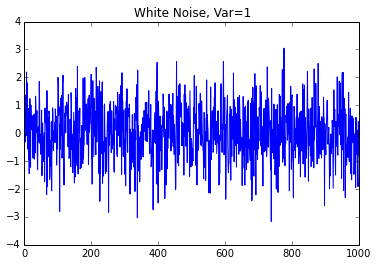

In [26]:
# example of first plot

plt.plot(noise1)
plt.title('White Noise, Var=1')

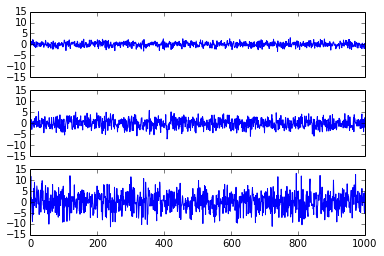

In [37]:
# the three plots sharing axes

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].plot(noise1)
axs[1].plot(noise2)
axs[2].plot(noise4)

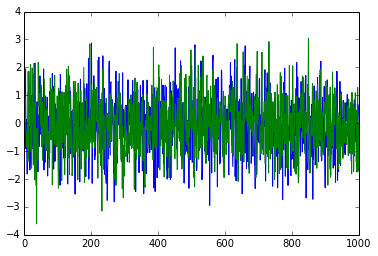

In [49]:
# b

X1 = np.random.normal(0,1,1000)
X2 = np.random.normal(0,1,1000)

plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
ax.legend(loc='best')

0.0863002390052


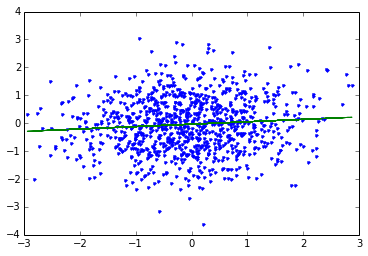

In [53]:
# scatter plot of same inputs with fitted line

m, b = np.polyfit(X1, X2, 1)

plt.plot(X1, X2, '.')
plt.plot(X1, m*X1 + b, '-')

print m

In [47]:
import statsmodels.api as sm

In [54]:
# regression results on above

model = sm.OLS(X1, X2)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.324
Date:                Fri, 24 Oct 2014   Prob (F-statistic):            0.00400
Time:                        19:22:11   Log-Likelihood:                -1424.6
No. Observations:                1000   AIC:                             2851.
Df Residuals:                     999   BIC:                             2856.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0928      0.032      2.885      0.004         0.030     0.156
Omnibus:                        0.290   Durbin-Watso

(array([  1.,   2.,   3.,   2.,   6.,   9.,   8.,   9.,  10.,   8.,  15.,
         21.,  19.,  22.,  29.,  35.,  39.,  28.,  46.,  44.,  54.,  57.,
         72.,  47.,  43.,  39.,  33.,  36.,  37.,  32.,  28.,  31.,  27.,
         28.,  17.,  14.,   9.,  10.,   9.,   7.,   4.,   2.,   1.,   1.,
          4.,   0.,   1.,   0.,   0.,   1.]),
 array([-0.0895626 , -0.08560953, -0.08165647, -0.0777034 , -0.07375033,
        -0.06979726, -0.06584419, -0.06189112, -0.05793805, -0.05398498,
        -0.05003191, -0.04607885, -0.04212578, -0.03817271, -0.03421964,
        -0.03026657, -0.0263135 , -0.02236043, -0.01840736, -0.01445429,
        -0.01050122, -0.00654816, -0.00259509,  0.00135798,  0.00531105,
         0.00926412,  0.01321719,  0.01717026,  0.02112333,  0.0250764 ,
         0.02902947,  0.03298253,  0.0369356 ,  0.04088867,  0.04484174,
         0.04879481,  0.05274788,  0.05670095,  0.06065402,  0.06460709,
         0.06856015,  0.07251322,  0.07646629,  0.08041936,  0.08437243,
 

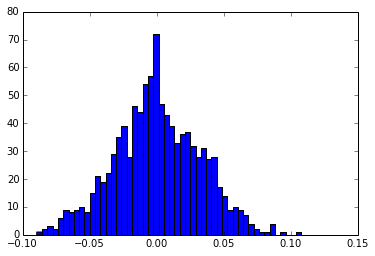

In [70]:
# c

Monte_count = range(1000)
Monte_coef = []

for i in Monte_count:
    X1 = np.random.normal(0,1,1000)
    X2 = np.random.normal(0,1,1000)
    
    m, b = np.polyfit(X1, X2, 1)
    Monte_coef.append(m)

# print len(Monte_coef)
plt.hist(Monte_coef, bins=50)